In [1]:
from src.detect_events import (
    calc_sta_lta,
    get_args_over_sta_lta_threshold,
    get_profile_details,
)
from src.get_seismogram import get_seismogram_iris
from src.plots import plot_spectrogram
from src.preprocess import reduce_noise, remove_response

In [2]:
STARTTIME = [1971, 7, 11, 8, 30]
ENDTIME = [1971, 7, 11, 18, 30]

st_raw = get_seismogram_iris(
    starttime=STARTTIME,
    endtime=ENDTIME,
)
st = remove_response(
    st_raw,
    starttime=STARTTIME,
    endtime=ENDTIME,
)

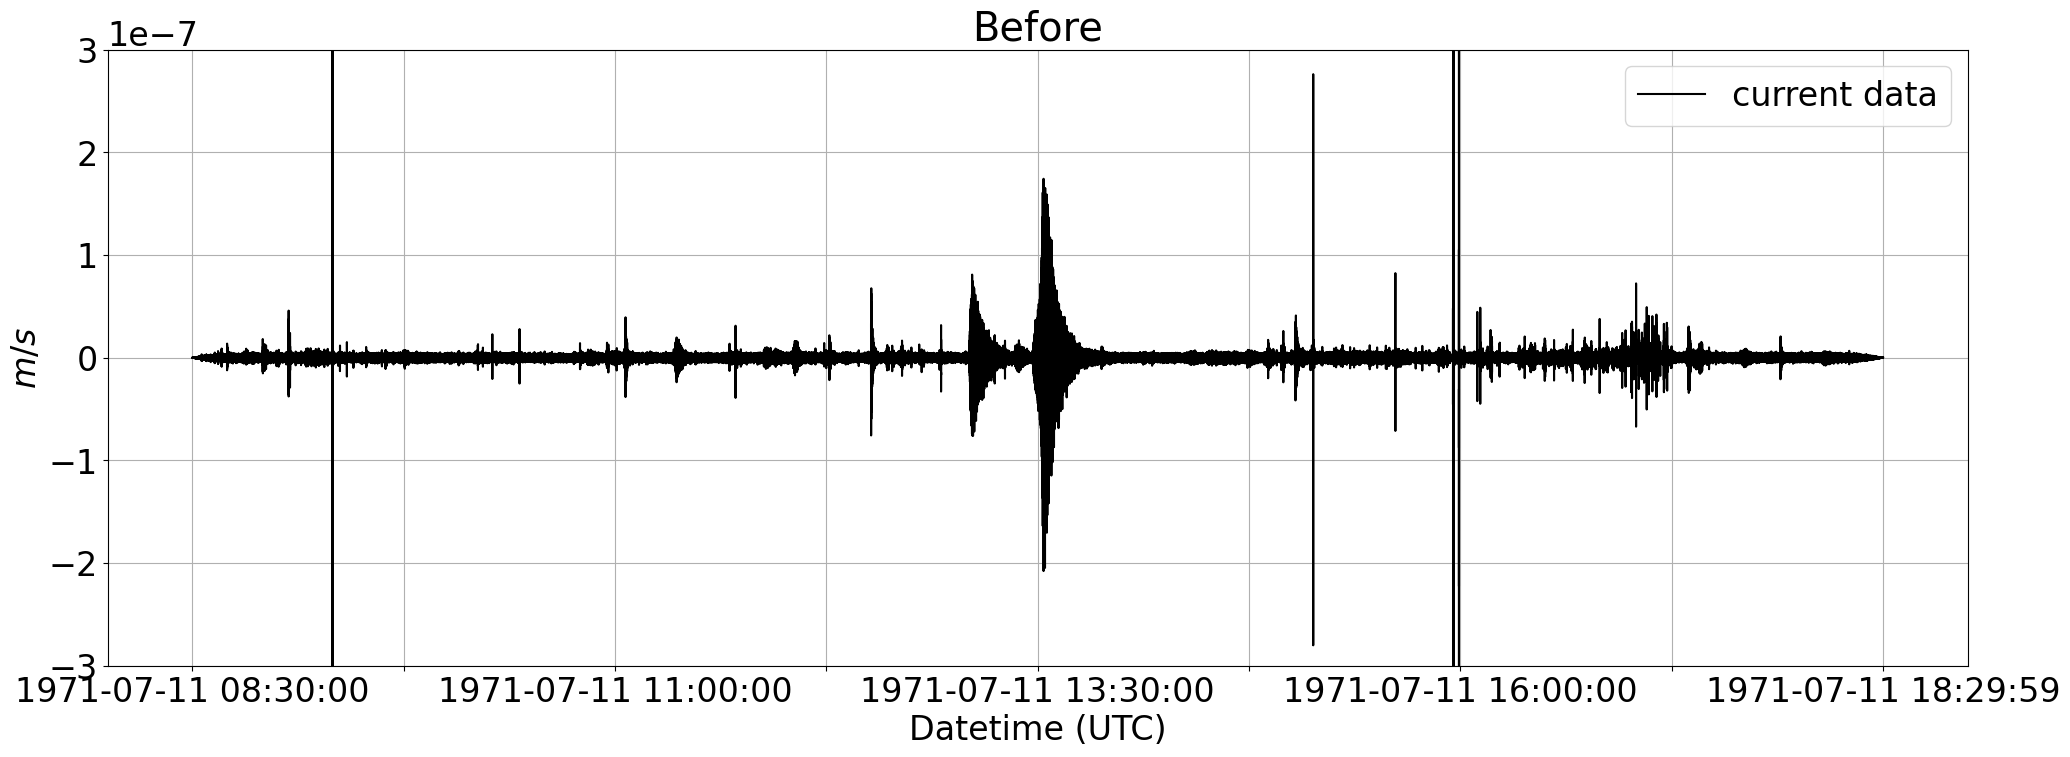

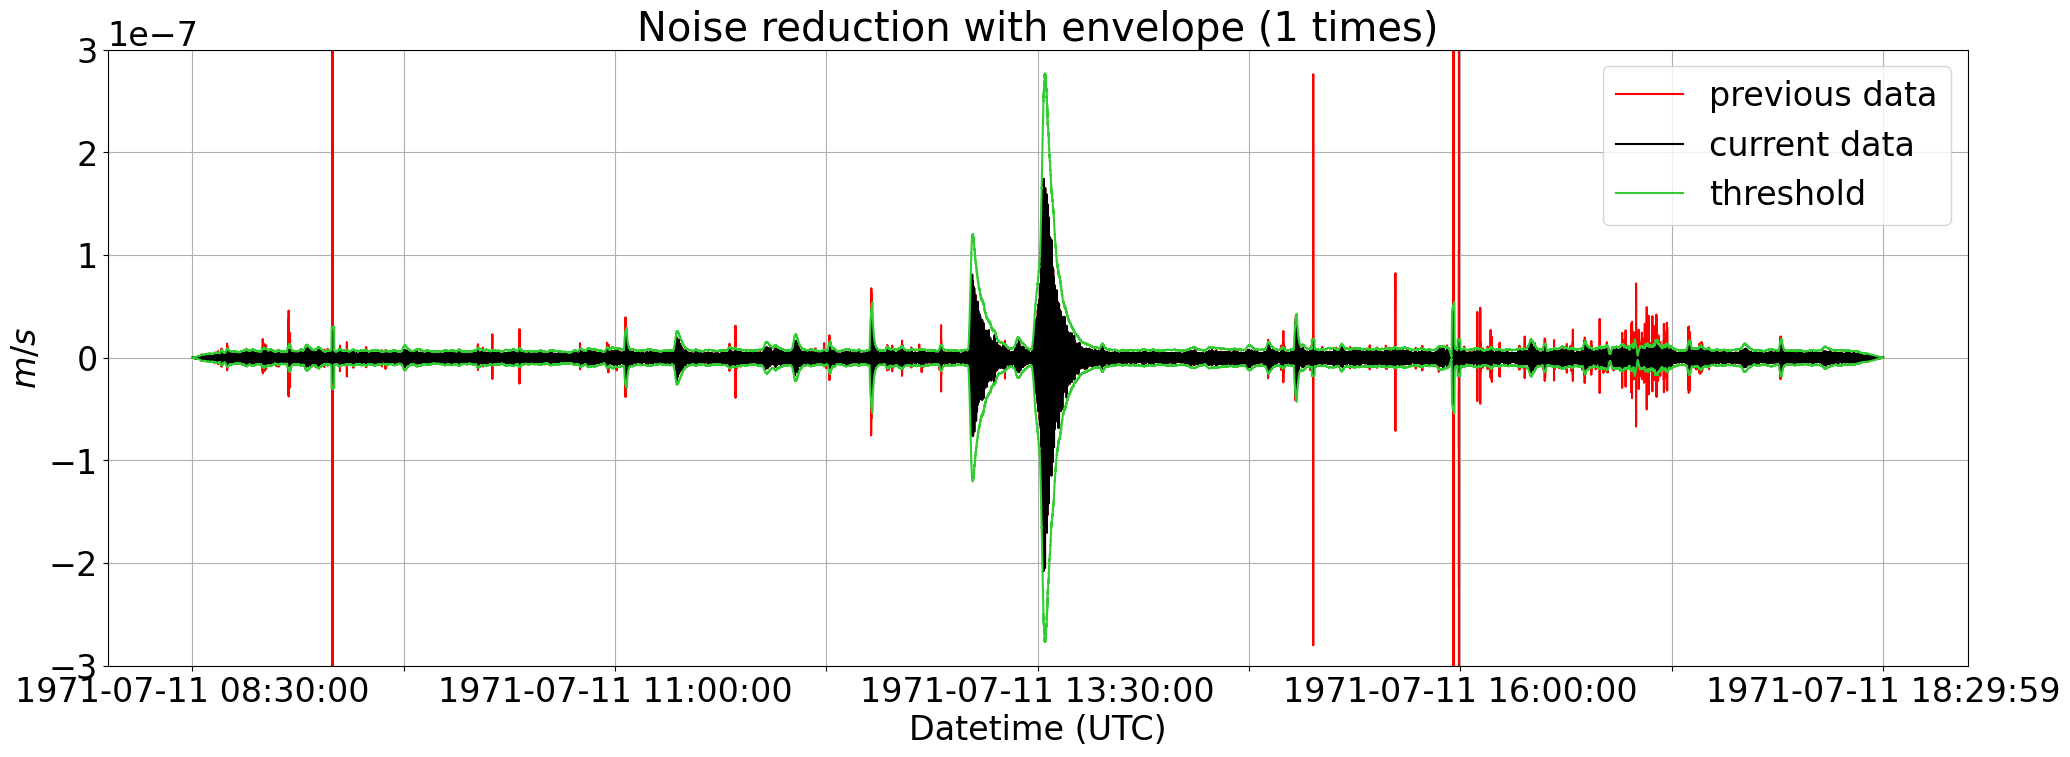

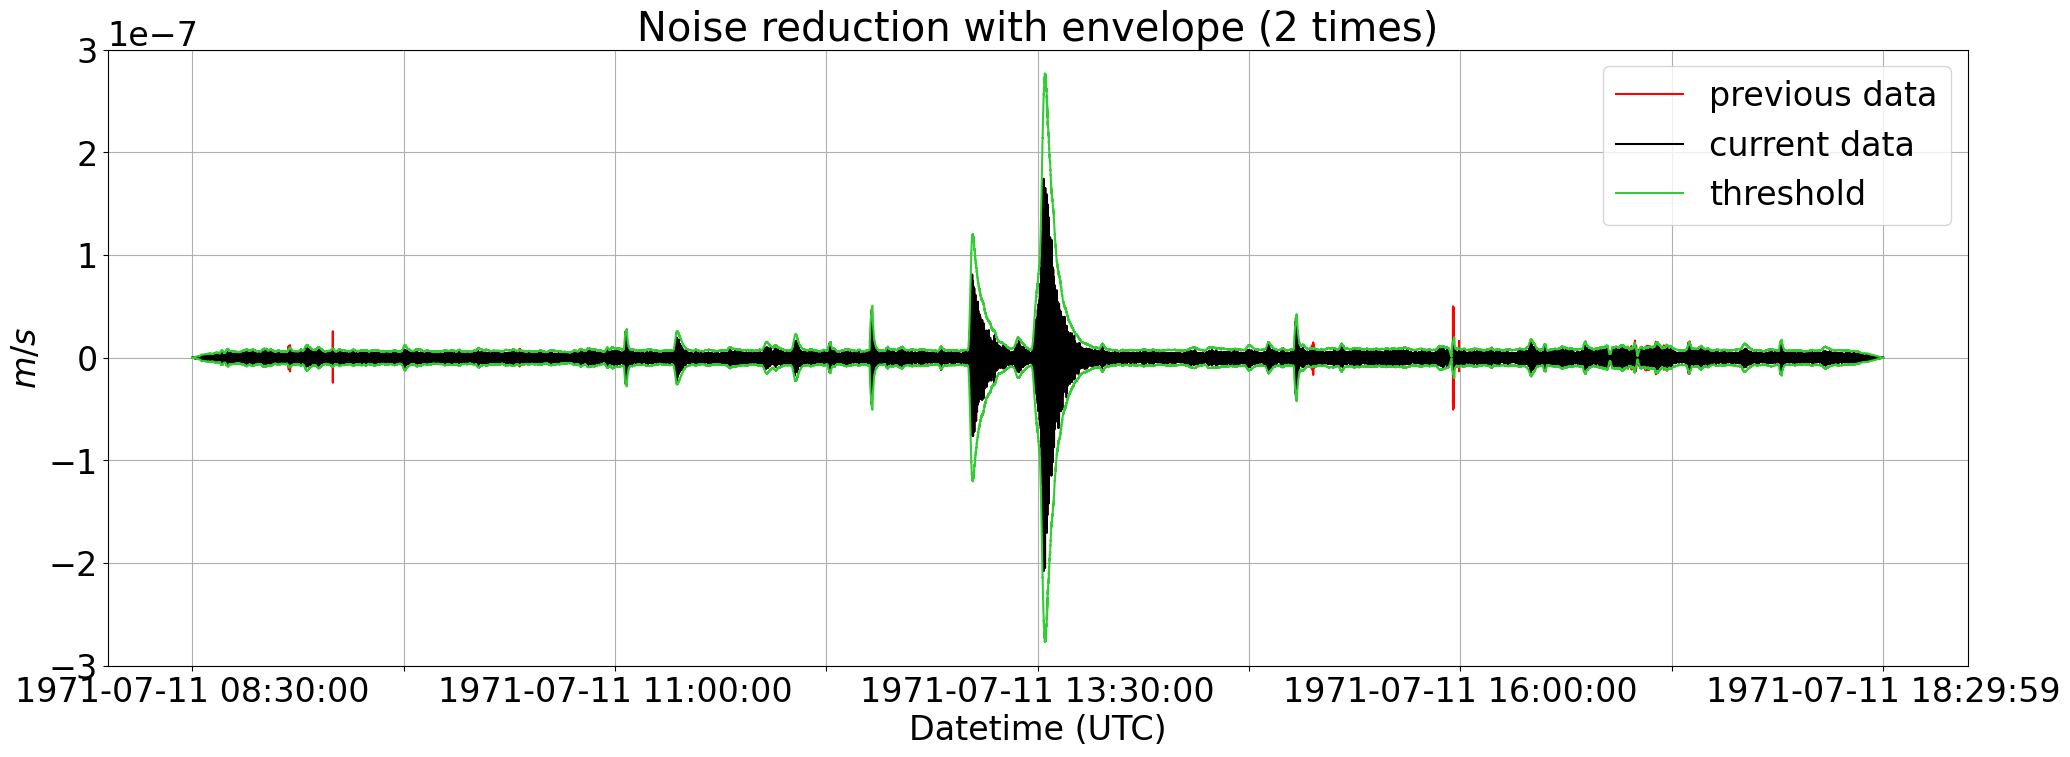

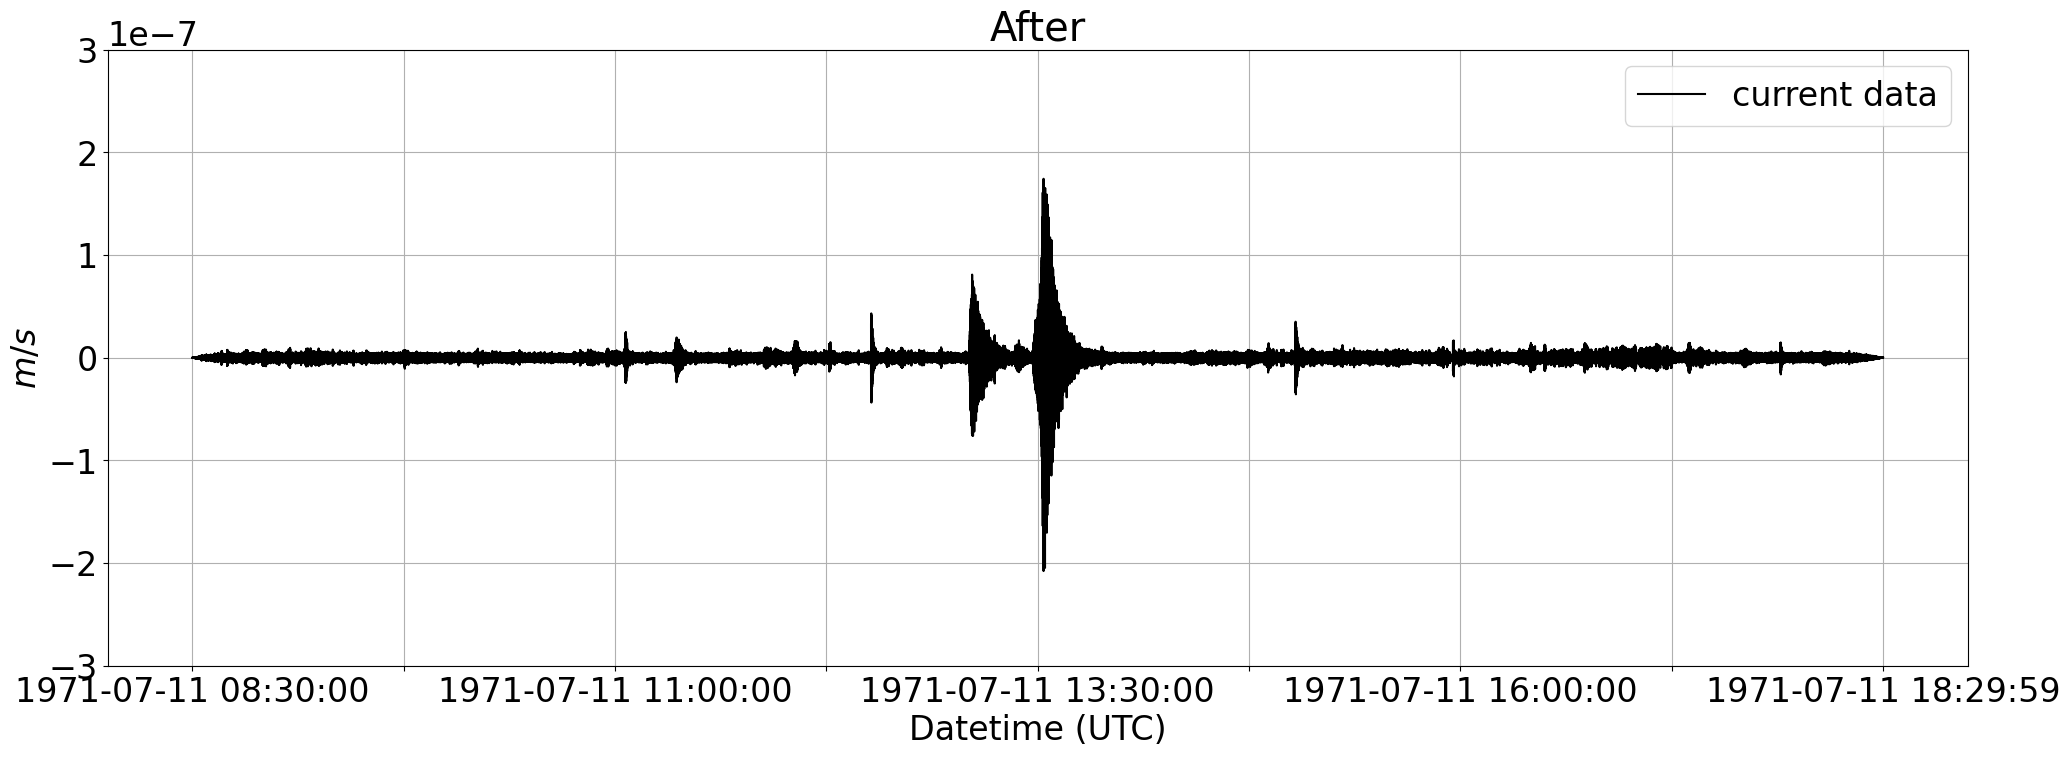

In [3]:
st = reduce_noise(st, times=2, is_plot=True)

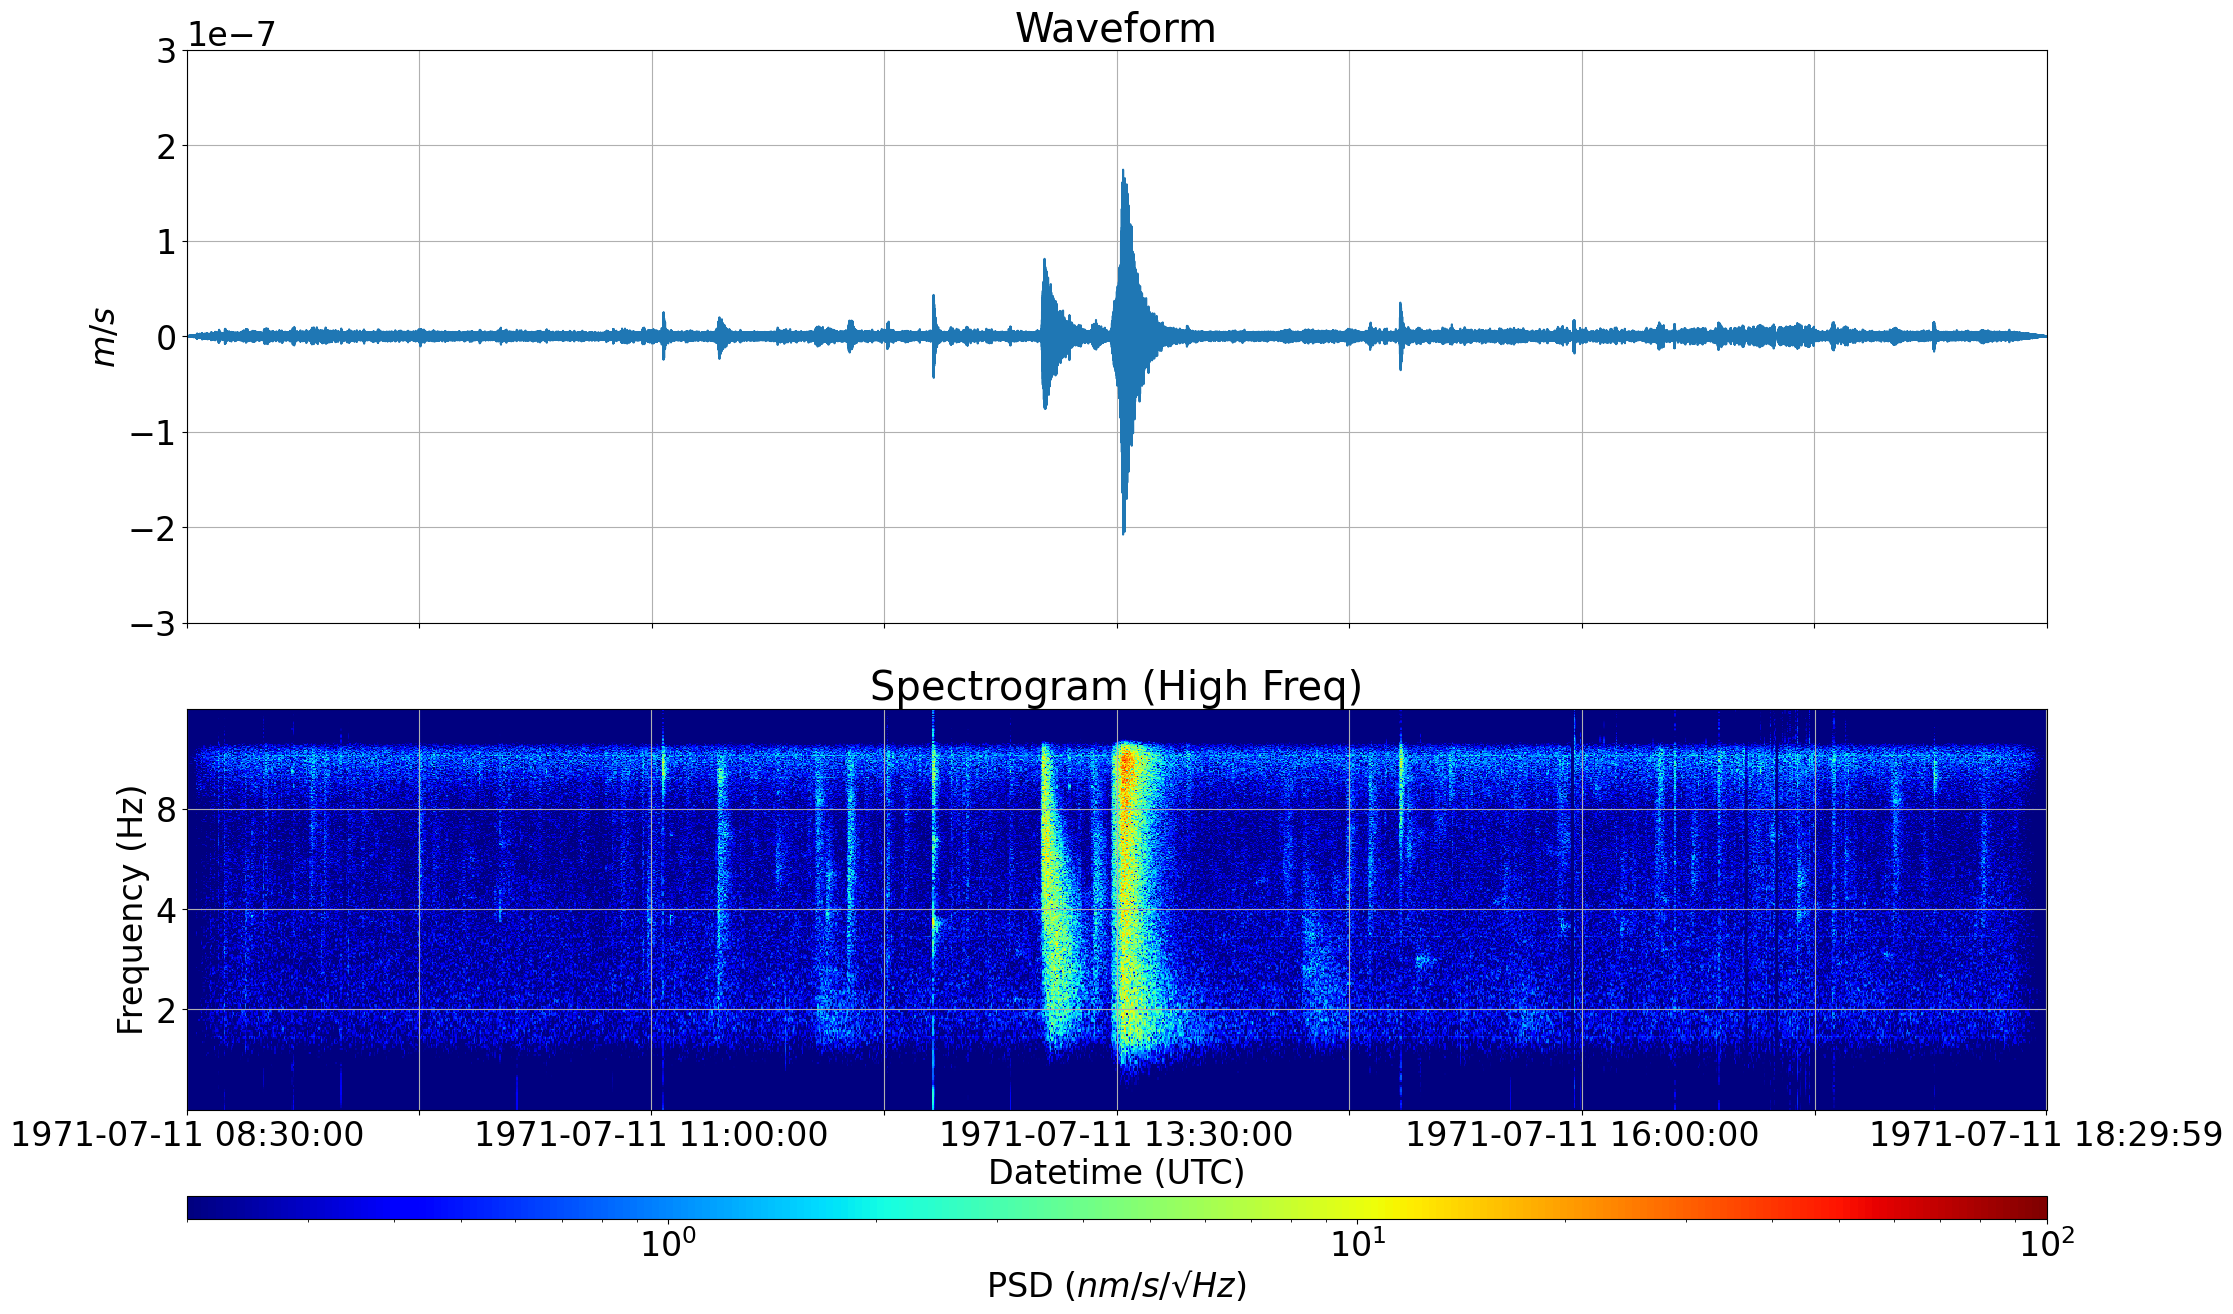

In [4]:
plot_spectrogram(st)

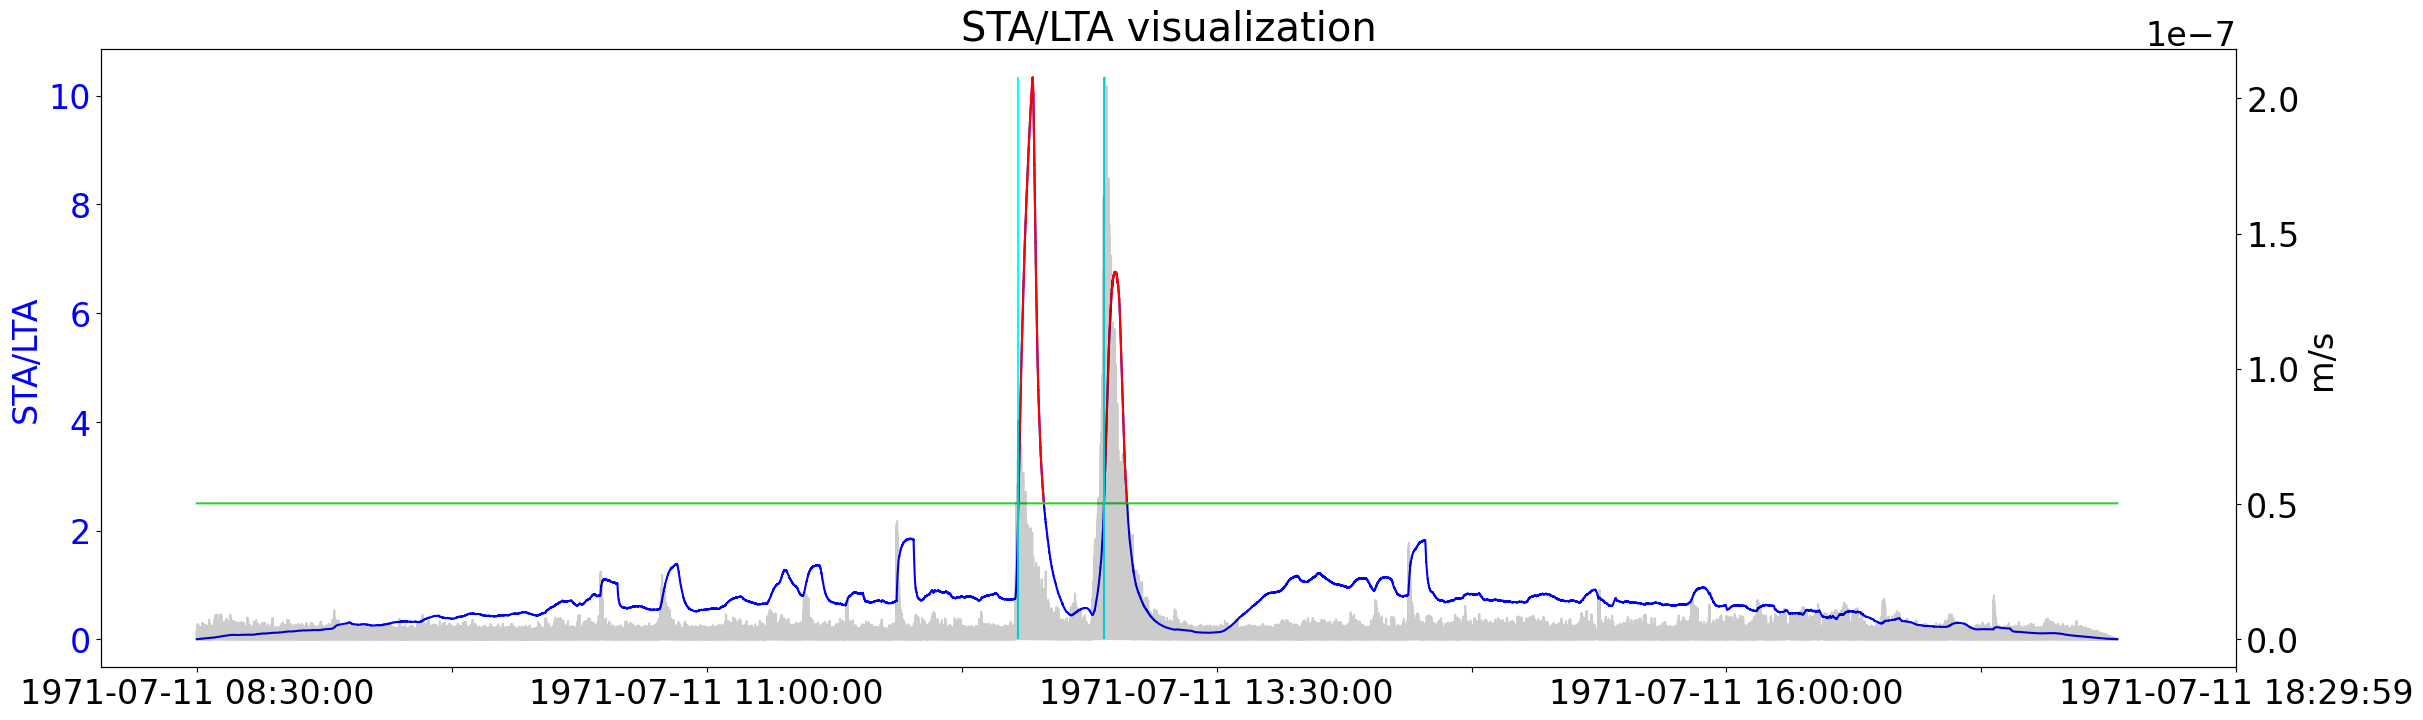

In [5]:
sta_lta = calc_sta_lta(stream=st, tl_sec=1800, ts_sec=300)

start_args, end_args = get_args_over_sta_lta_threshold(
    stream=st,
    input_sta_lta=sta_lta,
    sta_lta_threshold=2.5,
    run_length_threshold=st[0].stats.sampling_rate,  # 1秒
    plot_title="STA/LTA visualization",
)

[{'fwhm': 14980,
  'fwhm_end_arg': 786478,
  'fwhm_start_arg': 771499,
  'profile_argmax': 781915,
  'profile_half': 5.1691966191049055,
  'profile_max': 10.338393238209811},
 {'fwhm': 17784,
  'fwhm_end_arg': 867950,
  'fwhm_start_arg': 850167,
  'profile_argmax': 859312,
  'profile_half': 3.3808261682966303,
  'profile_max': 6.761652336593261}]


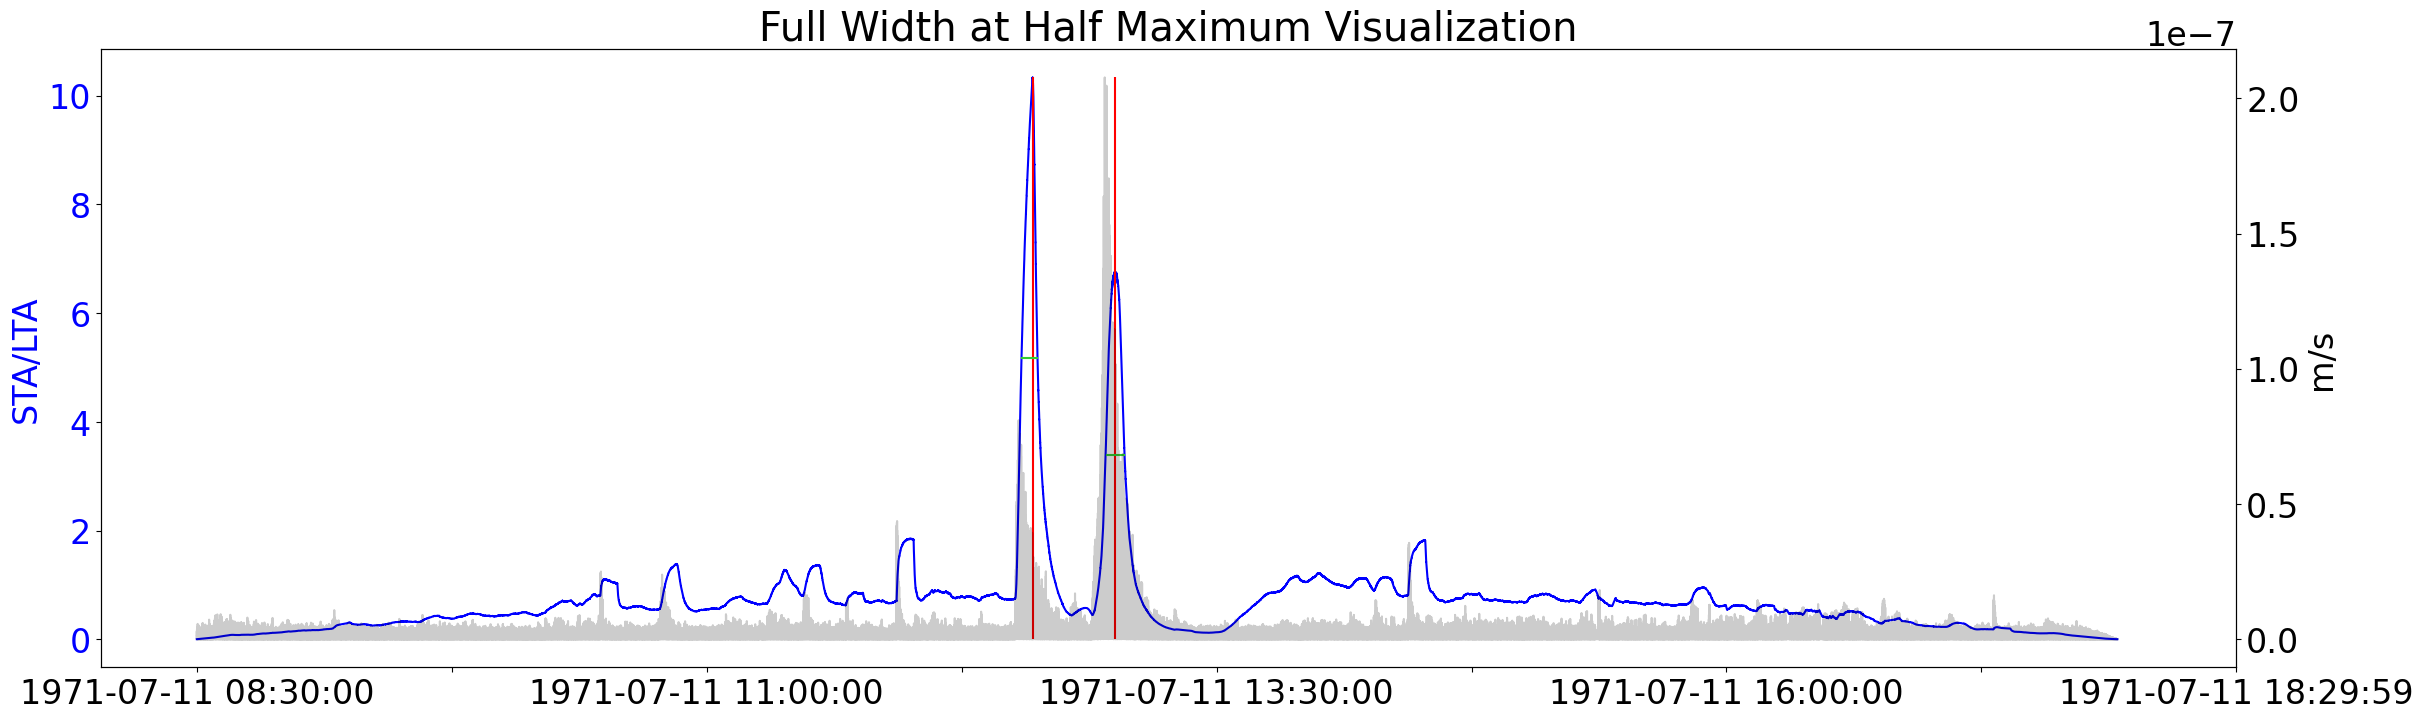

In [6]:
profile_details = get_profile_details(
    stream=st,
    input_sta_lta=sta_lta,
    start_args=start_args,
    end_args=end_args,
    plot_title="Full Width at Half Maximum Visualization",
)